## **Fraud Credit Card With Imbalance Data**
**Author**: Phan An Duy - 518H0616 || Lam Ngoc Hai - 518H0437

**Project**: DACNTT(2)

This project is created and collected through the website. With our main dataset come from Kaggle. Credit Fraud Detection, using dataset from it, read from ```pandas```, ```pytorch```,

This project meant to work with scaling the dataset

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import math

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



### **1. Understanding our data**

Reading out the dataset, fully formatted. For this is to having a glimpse of what is coming about the dataset, about the imbalance column, value, data, and numbers. From there we will have a look on what we are working on the dataset

Also on this dataset, we'll try to cover it all the rows and columns, to have a better sense on what we are working on.

- **id**: Unique identifier for each transaction
- **V1-V28**: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount**: The transaction amount
- **Class**: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [4]:
dataset = pd.read_csv("creditcard.csv")

To begin with the dataset, let's see how to dataset went

In [5]:
# The classes are heavily skewed we need to solve this issue later.
print('We have detected no Frauds Credit', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('We have detected Frauds Credit', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

We have detected no Frauds Credit 99.83 % of the dataset
We have detected Frauds Credit 0.17 % of the dataset


As at the time we detection, with non format all the dataset we can find the data value seem to be off set to no Frauds Credit, with the majority of ```99.83%``` of the value and only ```0.17%``` are the Frauds one

Definition: Because most of the transaction need to be secure during all the transaction, with many transaction need to be secure before can other transaction can be made. So the value contain the fraud only ```0.17%``` of the all the transaction made it. The dataset are validate to use as a research purpose



<Axes: xlabel='Class', ylabel='count'>

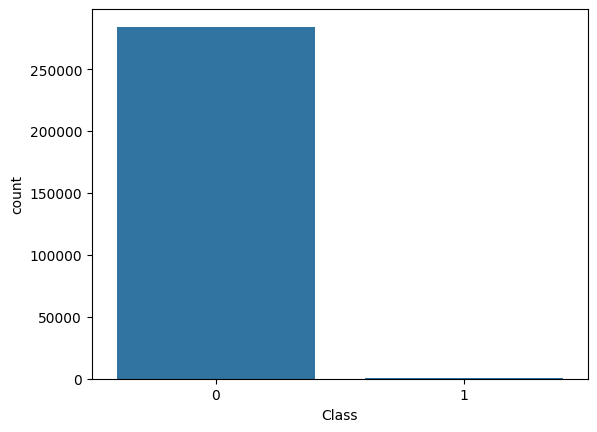

In [6]:
sns.countplot(x='Class', data=dataset)

Dataset for the testing out the dataset. With the fraudulent rate of ```0.17%``` hence the dataset rate of fraudent transaction are rare due to the security of the transaction. Hence the dataset are imbalance on one side 

In [7]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### **Result meaning**
The result above mean about the fraud numbers we about to figure it out. The dataset are varie
 and show the imbalance of the each transaction between V1-V28


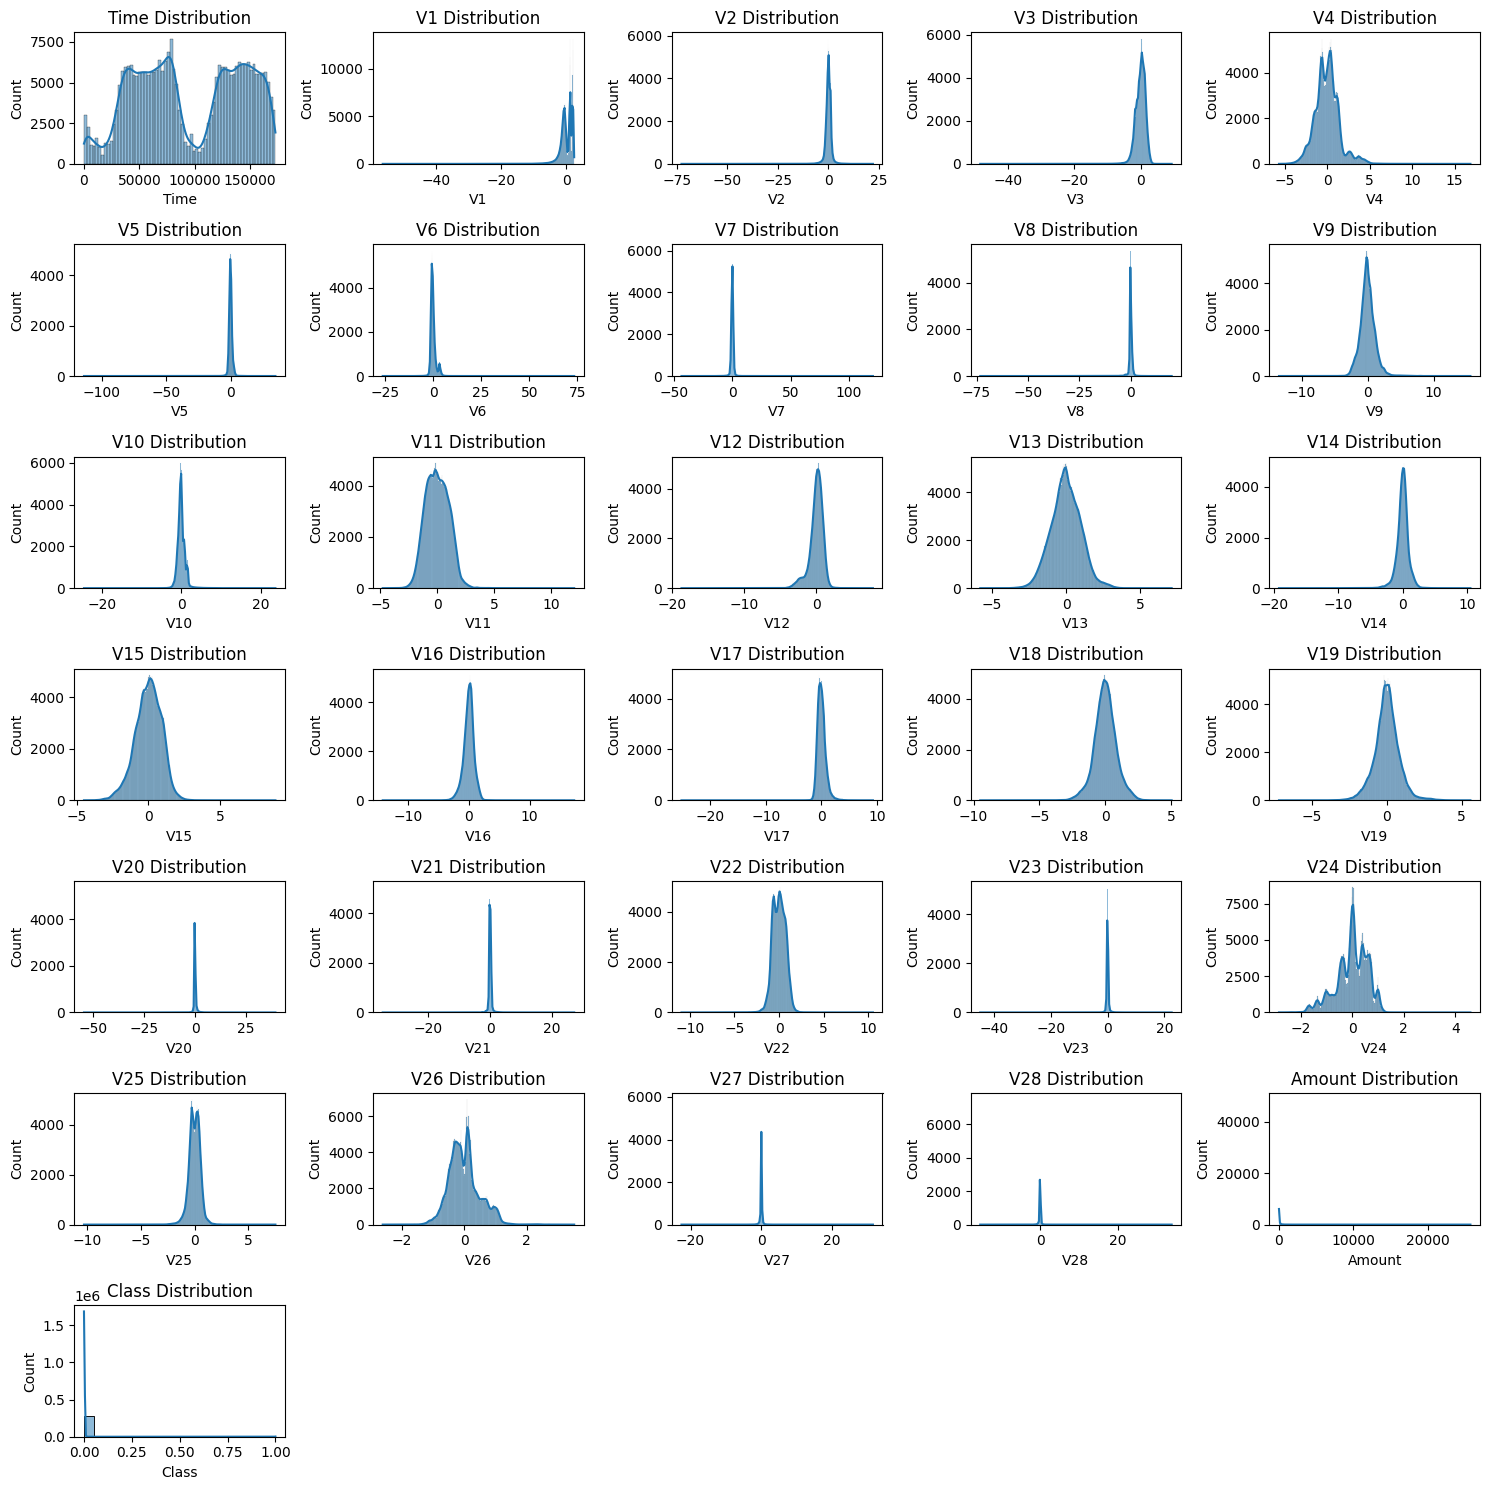

In [8]:
plt.figure(figsize=(15,15))
t = 1
for i in dataset.columns:
  plt.subplot(7,5,t)
  sns.histplot(dataset[i], kde= True)
  plt.title(i+' Distribution')
  t+= 1
plt.tight_layout()
plt.show()

### **Data Preprocessing**
This section start from here to pre-process all the dataset into a trainable one

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset['Amount'] = sc.fit_transform(pd.DataFrame(dataset['Amount']))

In [10]:
for col in ['V24','V26','Amount']:
  q1 = dataset[col].quantile(0.25)
  q3 = dataset[col].quantile(0.75)
  iqr = q3 - q1
  l = q1 - 1.5 * iqr
  u = q3 + 1.5 * iqr
  df1 = dataset[(dataset[col] >= l) & (dataset[col] <= u)]

In [11]:
df1.shape
df1['Class'].value_counts()

Class
0    252502
1       401
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in df1.columns:
  if i != 'Class':
    df1[i] = scaler.fit_transform(df1[[i]])

/var/folders/qn/yzftqp112g70kn5b9zk2y7b00000gn/T/ipykernel_27658/1537528698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = scaler.fit_transform(df1[[i]])
/var/folders/qn/yzftqp112g70kn5b9zk2y7b00000gn/T/ipykernel_27658/1537528698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = scaler.fit_transform(df1[[i]])
/var/folders/qn/yzftqp112g70kn5b9zk2y7b00000gn/T/ipykernel_27658/1537528698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [13]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataset['scaled_amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)

In [14]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = dataset.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
9660,1.236959,-0.290792,0.092911,-0.218213,0.144117,0.935210,-0.692318,0.245678,1.741505,-0.374029,...,-0.117630,-0.219820,-1.707389,0.292273,1.151042,-0.090027,-0.023344,0,0.237546,-0.825198
177195,-1.073820,0.415616,-2.273977,1.536844,-0.758697,-1.670381,-2.377140,0.090370,0.004847,-2.776747,...,0.863592,0.450743,-0.144228,-0.205609,-0.539073,0.503418,-0.237807,1,-0.153706,0.450969
278398,0.060414,0.844071,0.225624,-0.618221,0.442631,-1.049282,0.982048,-0.176258,0.024247,-0.398615,...,-0.629684,0.051754,-0.127649,-0.483426,0.148773,0.245141,0.094882,0,-0.282540,0.981109
16863,-2.787248,-0.071340,-1.505288,3.361777,-3.357422,0.565835,0.303653,0.966914,-2.245882,-3.651427,...,-0.246202,1.752227,0.219925,0.156282,-0.265894,0.220694,0.256077,1,9.905121,-0.663189
137705,-1.464897,1.975528,-1.077145,2.819191,0.069850,-0.789044,-1.196101,0.673654,-1.363724,-2.932895,...,-0.272505,-0.031549,-0.406166,0.157769,-0.104393,0.073796,-0.041570,1,-0.293440,-0.028231


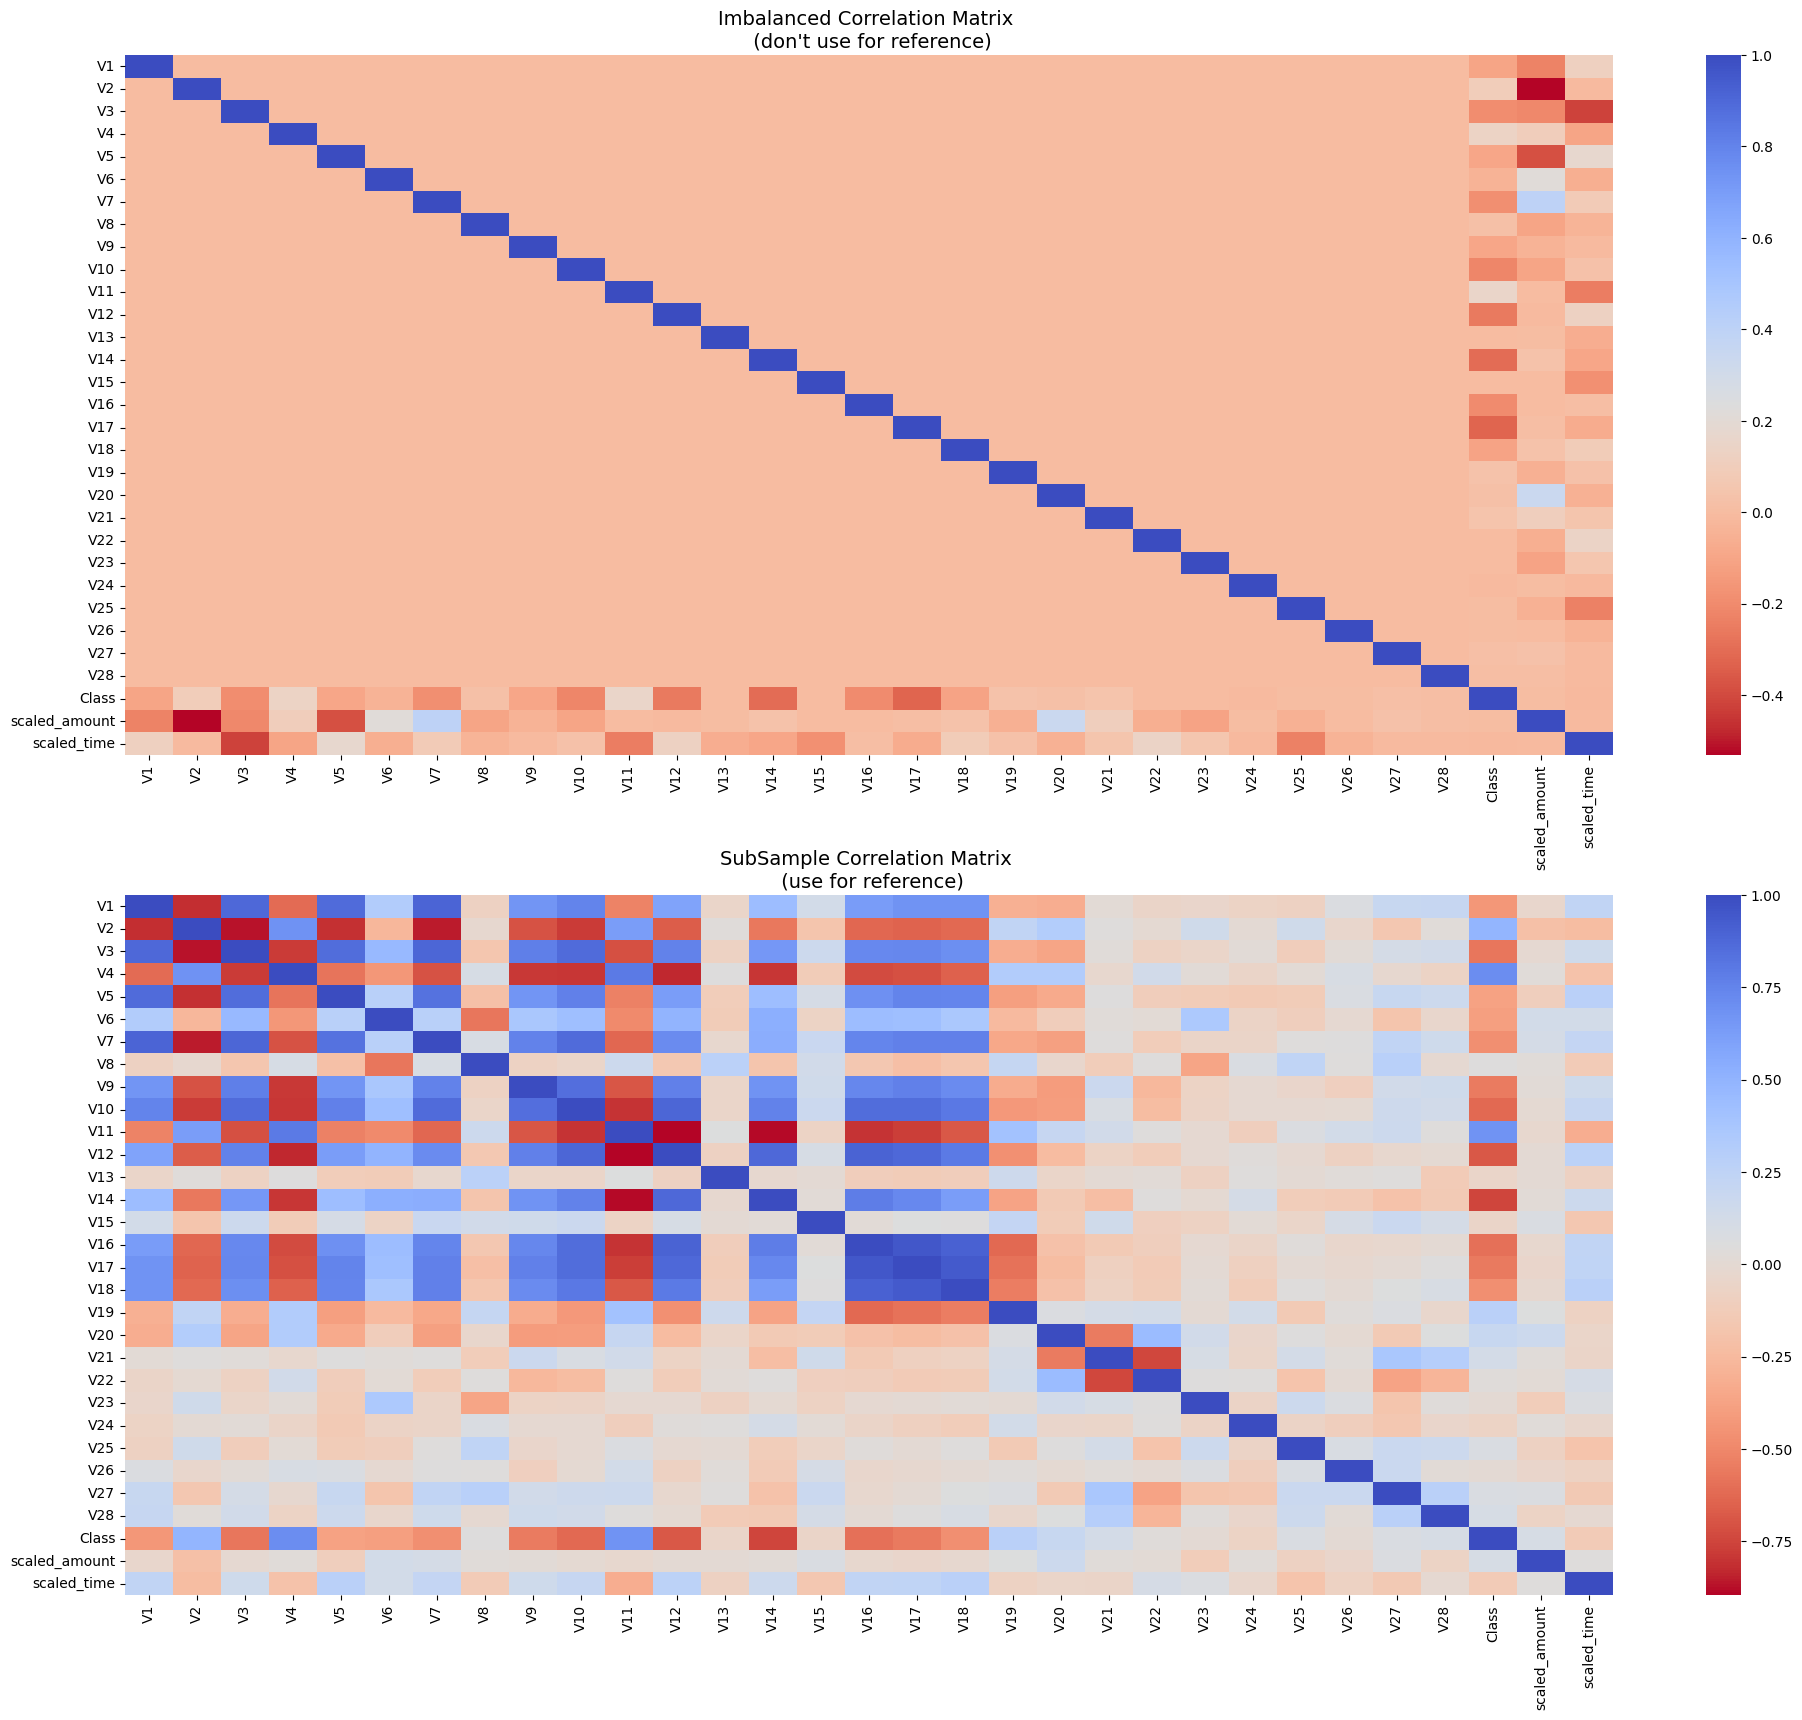

In [15]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = dataset.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

/var/folders/qn/yzftqp112g70kn5b9zk2y7b00000gn/T/ipykernel_27658/2779172976.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
/var/folders/qn/yzftqp112g70kn5b9zk2y7b00000gn/T/ipykernel_27658/2779172976.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

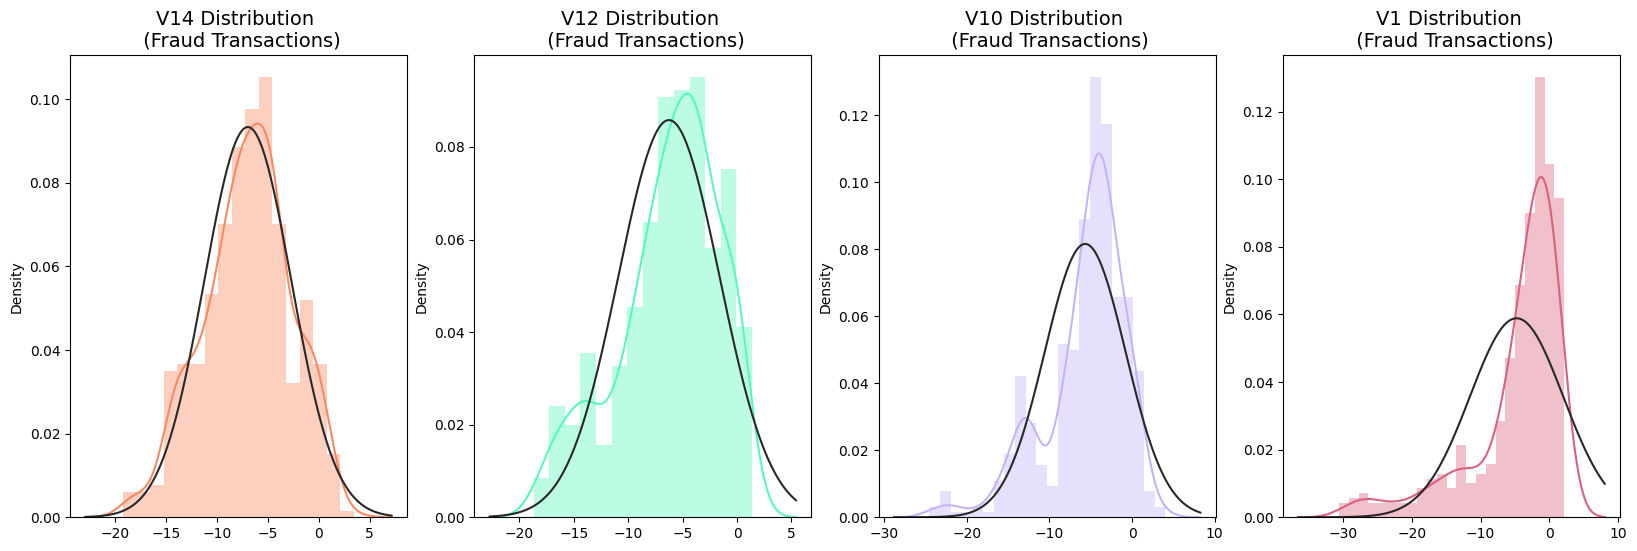

In [17]:
from scipy.stats import norm

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

v1_fraud_dist = new_df['V1'].loc[new_df['Class'] == 1].values
sns.distplot(v1_fraud_dist,ax=ax4, fit=norm, color='#DA627D')
ax4.set_title('V1 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

### **Train-Test-Split: Working on the dataset**

These method for training, processing the dataset, to match the usage need. By splitting the dataset, we'll have a glimpse of what the dataset working on

In [22]:
# Splitting the dataset.

from sklearn.model_selection import train_test_split
X = df1.drop('Class', axis = 1)
y = df1['Class']

df2 = df1.copy()
df3 = df1.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=10)

In [19]:
# Print out to get the glimpse of what on the dataset

print(X.shape, X_train.shape, X_test.shape)

(252903, 30) (126451, 30) (126452, 30)


With the above the dataset, the testing method function will take it out 31743 non fraudulent, and 30 transaction as the fraudulent transaction

In [20]:
# Using the Isolation Forest to recording the anomaly of the dataset

from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

iso = IsolationForest(n_estimators= 100, contamination= 0.0016, random_state= 28)
iso.fit(X)

df2['anomaly'] = iso.predict(X)
df2['anomaly'] = df2['anomaly'].map({1:0, -1:1})

In [34]:
pd.DataFrame(df2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,anomaly
0,-1.995729,-0.798955,-0.234412,1.682930,1.002430,-0.374492,0.412576,0.311307,0.063826,0.328336,...,0.385312,-0.269885,0.107767,0.249634,-0.399121,0.353824,-0.073187,2.718502,0,0
1,-1.995729,0.602853,0.027611,0.071916,0.335188,-0.046555,-0.018249,0.004779,0.052073,-0.244277,...,-0.898081,0.218126,-0.567204,0.326026,0.272414,-0.030234,0.061190,-0.765550,0,0
3,-1.995708,-0.582758,-0.321341,1.177605,-0.605727,-0.104452,1.033264,0.309392,0.304757,-1.290718,...,0.003639,-0.453894,-1.953949,1.275621,-0.469074,0.162967,0.236717,2.099136,0,0
4,-1.995687,-0.688216,0.500419,1.011548,0.302816,-0.431192,0.122749,0.651473,-0.255325,0.748126,...,1.114088,-0.332071,0.231119,-0.411929,1.074816,0.585171,0.813986,0.830290,0,0
5,-1.995687,-0.285931,0.564420,0.734460,-0.107061,0.250618,0.023377,0.539087,0.203521,-0.533950,...,-0.787671,-0.076129,-0.619606,-0.464894,0.229821,0.677916,0.310418,-0.742312,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,1.634598,0.014180,0.541600,-0.412430,-0.520927,0.834580,-0.139737,0.863059,0.077997,-0.196781,...,-1.135920,0.100721,0.167289,-0.866473,0.268543,0.581177,0.264307,-0.765550,0,0
284802,1.634619,-6.579047,7.608195,-6.726852,-1.469098,-4.512332,-2.014784,-4.654167,6.293000,1.762284,...,0.152898,2.322603,-0.848463,2.836702,0.537054,2.536502,3.099758,-0.811077,0,0
284803,1.634640,-0.454490,-0.220727,1.342139,-0.516257,0.618816,0.883957,0.104066,0.233389,0.532717,...,1.290673,0.013427,-1.689537,-1.204134,-0.838570,0.178459,-0.195158,-0.241507,0,0
284804,1.634661,1.002633,-0.411040,-2.250332,-0.386568,2.069639,2.444222,-0.205114,0.590846,0.391836,...,0.805951,-0.101717,1.058901,0.520956,-0.182224,0.005972,-0.093874,0.780257,0,0


In [ ]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, Y_train)
    training_score = cross_val_score(classifier, X_train, Y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 100.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 100.0 % accuracy score


### **Using Logistic Regression**

This logistic regression is the based model that most of use will be using during the first section of the

In [ ]:
# Using the LogisticRegression as the methodology of training model

model = LogisticRegression()
model2 = LogisticRegression(solver='liblinear', random_state=10, penalty='elasticnet')

model.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("Logistic Regression Training Data Accuracy: ", training_data_accuracy)

In [40]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print(test_data_accuracy)

0.999161737259988


After testing with multiple dataset and model training with Logistic Regression can learning up-to ```0.99%``` with this dataset, and compare with the training data accuracy of ```0.998%```

The margin of those result are comparably small. So with Logistic Regression, the data result are fairly accurate


### **Using Decision Tree Classifier**

The Decision Tree is a way to split out the training the dataset, each of every node will split to 2 type of statement, testing out all of the testing purpose to find out hte model working for the dataset. 


In [41]:
decision_model = DecisionTreeClassifier()

decision_model.fit(X_train, Y_train)

prediction = decision_model.predict(X_test)

In [42]:
test_data = accuracy_score(prediction, Y_test)
print("Prediction using the DecisionTree Classifier",test_data)

Prediction using the DecisionTree Classifier 0.9993040837630089


As the decision model: The dataset prediction more accurate, with the testing data

### **Using the K-Neighbor Classifier**

In [43]:
K_model = KNeighborsClassifier()

K_model.fit(X_train, Y_train)

K_prediction = K_model.predict(X_test)

In [44]:
K_test_data = accuracy_score(K_prediction, Y_test)
print("Prediction using the K-Nearest Neighbor: ", K_test_data)

Prediction using the K-Nearest Neighbor:  0.9995650523518805
